In [176]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

test_vus = [1, 10, 50, 100, 400]
test1_iterations = 500_000
test2_iterations = 200_000
test3_iterations =  20_000

In [207]:
def analyzeGrpcLatency(fileName:str, plotTitle:str, bins:int, cutoff = None):
    data = pandas.read_csv(fileName, low_memory=False)
    data = data[data["status"] == "OK"]
    data["duration (ms)"] = data["duration (ms)"].astype(float)
    
    print("count: ",data["duration (ms)"].count())
    print("median: ",data["duration (ms)"].median())
    print("mean: ", data["duration (ms)"].mean())
    print("min: ", data["duration (ms)"].min())
    print("max: ", data["duration (ms)"].max())

    if cutoff == None:
        data["duration (ms)"].plot(kind="hist", title=plotTitle, bins=bins)
        return
    data["duration (ms)"].loc[data["duration (ms)"] <= cutoff ].plot(kind="hist", title=plotTitle, bins=bins)

def analyzeHttpLatency(fileName:str, plotTitle:str, bins:int, cutoff = None):
    temp = pandas.read_csv(fileName, low_memory=False)
    data = temp[temp["metric_name"] == "http_req_duration"]
  
    print("count: ",data["metric_value"].count())
    print("median: ",data["metric_value"].median())
    print("mean: ", data["metric_value"].mean())
    print("min: ", data["metric_value"].min())
    print("max: ", data["metric_value"].max())
    
    if cutoff == None:
        data["metric_value"].plot(kind="hist", title=plotTitle, bins=bins)
        return
    data["metric_value"].loc[data["metric_value"] <= cutoff ].plot(kind="hist", title=plotTitle, bins=bins)

In [224]:
def generateChart(vus, averagesG, averagesH, title="Title", xlabel="X label", ylabel="Y label"):

    z = np.polyfit(vus, averagesG, 1)
    p = np.poly1d(z)
    plt.plot(vus, p(vus), color='blue', linestyle='dashed', linewidth=2) # add the trendline

    z = np.polyfit(vus, averagesH, 1)
    p = np.poly1d(z)
    plt.plot(vus, p(vus), color='red', linestyle='dashed', linewidth=2) # add the trendline

    plt.scatter(vus, averagesG, color="blue", label="gRPC")
    # plt.scatter([1,2,3,4], averagesH, color="red", label="http")
    plt.scatter(vus, averagesH, color="red", label="http")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.xticks([1,2,3,4], vus)
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.title(title)
    plt.legend()
    plt.savefig(title, dpi=300)
    plt.show()


In [101]:
def getAverageThroughput(iterations, averages):
    return iterations / np.mean(averages)

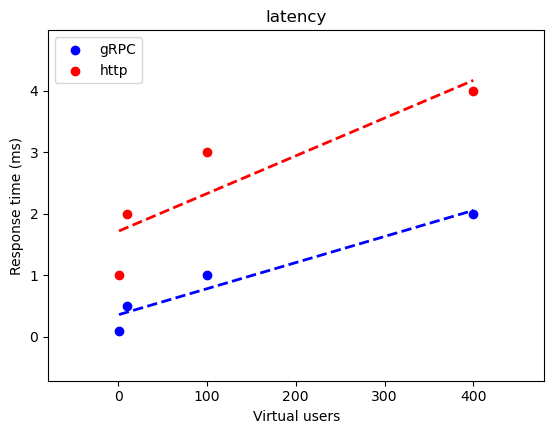

In [93]:
generateChart([1, 10, 100, 400], [0.1, 0.5, 1, 2], [1, 2, 3, 4], "latency", "Virtual users", "Response time (ms)")

# Test 1

## gRPC

In [157]:
t1g1 = pandas.read_csv("./test1/grpcThroughputsTest1VU1.csv", low_memory=False)
t1g10 = pandas.read_csv("./test1/grpcThroughputsTest1VU10.csv", low_memory=False)
t1g50 = pandas.read_csv("./test1/grpcThroughputsTest1VU50.csv", low_memory=False)
t1g100 = pandas.read_csv("./test1/grpcThroughputsTest1VU100.csv", low_memory=False)
t1g400 = pandas.read_csv("./test1/grpcThroughputsTest1VU400.csv", low_memory=False)

print(t1g1["duration (ms)"].loc[t1g1["status"] == "OK"].mean())
print(t1g50["duration (ms)"].loc[t1g50["status"] == "OK"].mean())
print(t1g100["duration (ms)"].loc[t1g100["status"] == "OK"].mean())
print(t1g400["duration (ms)"].loc[t1g400["status"] == "OK"].mean())

0.06760222000000005
0.5897351799999998
1.1813459200000005
4.27716574


In [233]:
# average throughput time
t1_g1_times = [40.135, 41.856, 40.187, 39.801]
t1_g10_times = [10.59, 10.06, 9.96, 10.22]
t1_g50_times = [7.379, 7.425, 7.940, 7.404]
t1_g100_times = [7.055, 7.180, 7.034, 7.478]
t1_g400_times = [6.869, 6.882, 6.876, 6.906]

t1_g1_avg = round(np.mean(t1_g1_times), 2)
t1_g10_avg = round(np.mean(t1_g10_times), 2)
t1_g50_avg = round(np.mean(t1_g50_times), 2)
t1_g100_avg = round(np.mean(t1_g100_times), 2)
t1_g400_avg = round(np.mean(t1_g400_times), 2)

print("Throughput time")
print(t1_g1_avg)
print(t1_g10_avg)
print(t1_g50_avg)
print(t1_g100_avg)
print(t1_g400_avg)

# average throughput
t1_g1_thru = round(
    getAverageThroughput(test1_iterations, [40.135, 41.856, 40.187, 39.801]), 2
)
t1_g10_thru = round(getAverageThroughput(test1_iterations, t1_g10_times), 2)
t1_g50_thru = round(
    getAverageThroughput(test1_iterations, [7.379, 7.425, 7.940, 7.404]), 2
)
t1_g100_thru = round(
    getAverageThroughput(test1_iterations, [7.055, 7.180, 7.034, 7.478]), 2
)
t1_g400_thru = round(
    getAverageThroughput(test1_iterations, [6.869, 6.882, 6.876, 6.906]), 2
)

t1_g1_thru_min = round(test1_iterations / max(t1_g1_times), 2)
t1_g10_thru_min = round(test1_iterations / max(t1_g10_times), 2)
t1_g50_thru_min = round(test1_iterations / max(t1_g50_times), 2)
t1_g100_thru_min = round(test1_iterations / max(t1_g100_times), 2)
t1_g400_thru_min = round(test1_iterations / max(t1_g400_times), 2)

t1_g1_thru_max = round(test1_iterations / min(t1_g1_times), 2)
t1_g10_thru_max = round(test1_iterations / min(t1_g10_times), 2)
t1_g50_thru_max = round(test1_iterations / min(t1_g50_times), 2)
t1_g100_thru_max = round(test1_iterations / min(t1_g100_times), 2)
t1_g400_thru_max = round(test1_iterations / min(t1_g400_times), 2)

print("Througput")
print("avg, min, max")
print(t1_g1_thru, t1_g1_thru_min, t1_g1_thru_max)
print(t1_g10_thru, t1_g10_thru_min, t1_g10_thru_max)
print(t1_g50_thru, t1_g50_thru_min, t1_g50_thru_max)
print(t1_g100_thru, t1_g100_thru_min, t1_g100_thru_max)
print(t1_g400_thru, t1_g400_thru_min, t1_g400_thru_max)

# average latency
t1_g1_lat_mean = t1g1["duration (ms)"].loc[t1g1["status"] == "OK"].mean()
t1_g10_lat_mean = t1g10["duration (ms)"].loc[t1g10["status"] == "OK"].mean()
t1_g50_lat_mean = t1g50["duration (ms)"].loc[t1g50["status"] == "OK"].mean()
t1_g100_lat_mean = t1g100["duration (ms)"].loc[t1g100["status"] == "OK"].mean()
t1_g400_lat_mean = t1g400["duration (ms)"].loc[t1g400["status"] == "OK"].mean()

t1_g1_lat_mean = round(t1_g1_lat_mean, 2)
t1_g10_lat_mean = round(t1_g10_lat_mean, 2)
t1_g50_lat_mean = round(t1_g50_lat_mean, 2)
t1_g100_lat_mean = round(t1_g100_lat_mean, 2)
t1_g400_lat_mean = round(t1_g400_lat_mean, 2)

t1_g1_lat_min = t1g1["duration (ms)"].loc[t1g1["status"] == "OK"].min()
t1_g10_lat_min = t1g10["duration (ms)"].loc[t1g10["status"] == "OK"].min()
t1_g50_lat_min = t1g50["duration (ms)"].loc[t1g50["status"] == "OK"].min()
t1_g100_lat_min = t1g100["duration (ms)"].loc[t1g100["status"] == "OK"].min()
t1_g400_lat_min = t1g400["duration (ms)"].loc[t1g400["status"] == "OK"].min()

t1_g1_lat_max = t1g1["duration (ms)"].loc[t1g1["status"] == "OK"].max()
t1_g10_lat_max = t1g10["duration (ms)"].loc[t1g10["status"] == "OK"].max()
t1_g50_lat_max = t1g50["duration (ms)"].loc[t1g50["status"] == "OK"].max()
t1_g100_lat_max = t1g100["duration (ms)"].loc[t1g100["status"] == "OK"].max()
t1_g400_lat_max = t1g400["duration (ms)"].loc[t1g400["status"] == "OK"].max()

print("Response time:")
print("avg, min, max")
print(t1_g1_lat_mean, t1_g1_lat_min, t1_g1_lat_max)
print(t1_g10_lat_mean, t1_g10_lat_min, t1_g10_lat_max)
print(t1_g50_lat_mean, t1_g50_lat_min, t1_g50_lat_max)
print(t1_g100_lat_mean, t1_g100_lat_min, t1_g100_lat_max)
print(t1_g400_lat_mean, t1_g400_lat_min, t1_g400_lat_max)

Throughput time
40.49
10.21
7.54
7.19
6.88
Througput
avg, min, max
12347.28 11945.72 12562.5
48983.59 47214.35 50200.8
66339.39 62972.29 67759.86
69572.48 66862.8 71083.31
72640.1 72400.81 72790.8
Response time:
avg, min, max
0.07 0.04 1.73
0.16 0.04 9.87
0.59 0.04 7.09
1.18 0.05 15.07
4.28 0.06 21.67


## HTTP

In [173]:
t1h1 = pandas.read_csv("./test1/httpThroughputTest1VU1.csv", low_memory=False)
t1h10 = pandas.read_csv("./test1/httpThroughputTest1VU10.csv", low_memory=False)
t1h50 = pandas.read_csv("./test1/httpThroughputTest1VU50.csv", low_memory=False)
t1h100 = pandas.read_csv("./test1/httpThroughputTest1VU100.csv", low_memory=False)
t1h400 = pandas.read_csv("./test1/httpThroughputTest1VU400.csv", low_memory=False)

t1h1 = t1h1[t1h1["metric_name"] == "http_req_duration"]
t1h10 = t1h10[t1h10["metric_name"] == "http_req_duration"]
t1h50 = t1h50[t1h50["metric_name"] == "http_req_duration"]
t1h100 = t1h100[t1h100["metric_name"] == "http_req_duration"]
t1h400 = t1h400[t1h400["metric_name"] == "http_req_duration"]

In [171]:
# average throughput time
t1_h1_time = [76.932, 77.065, 79.078, 79.687]
t1_h10_time = [23.10, 23.25, 23.09, 23.04]
t1_h50_time = [18.930, 18.927, 19.127, 20.272]
t1_h100_time = [18.916, 18.948, 18.398, 18.561]
t1_h400_time = [18.291, 18.640, 18.445, 18.362]

t1_h1_avg = round(np.mean(t1_h1_time), 2)
t1_h50_avg = round(np.mean(t1_h50_time), 2)
t1_h100_avg = round(np.mean(t1_h100_time), 2)
t1_h400_avg = round(np.mean(t1_h400_time), 2)

print("Throughput time")
print(t1_h1_avg)
print(t1_h50_avg)
print(t1_h100_avg)
print(t1_h400_avg)

# average throughput
t1_h1_thru = getAverageThroughput(test1_iterations, t1_h1_time)
t1_h50_thru = getAverageThroughput(test1_iterations, t1_h50_time)
t1_h100_thru = getAverageThroughput(test1_iterations, t1_h100_time)
t1_h400_thru = getAverageThroughput(test1_iterations, t1_h400_time)

print("Througput")
print(t1_h1_thru)
print(t1_h50_thru)
print(t1_h100_thru)
print(t1_h400_thru)

# average latency
t1_h1_lat = t1h1["metric_value"].mean()
t1_h50_lat = t1h50["metric_value"].mean()
t1_h100_lat = t1h100["metric_value"].mean()
t1_h400_lat = t1h400["metric_value"].mean()

print("Response time")
print(t1_h1_lat)
print(t1_h50_lat)
print(t1_h100_lat)
print(t1_h400_lat)


Throughput time
78.19
19.31
18.71
18.43
Througput
6394.638734884673
25887.95692243968
26729.748874009325
27123.057311020097
Response time
0.08002654912600006
1.7630520929299993
3.2717284684700005
12.206200799975997


In [179]:
# average throughput
t1_h1_thru = round(getAverageThroughput(test1_iterations, t1_h1_time), 2)
t1_h10_thru = round(getAverageThroughput(test1_iterations, t1_h10_time), 2)
t1_h50_thru = round(getAverageThroughput(test1_iterations, t1_h50_time), 2)
t1_h100_thru = round(getAverageThroughput(test1_iterations, t1_h100_time), 2)
t1_h400_thru = round(getAverageThroughput(test1_iterations, t1_h400_time), 2)

t1_h1_thru_min = round(test1_iterations / max(t1_h1_time), 2)
t1_h10_thru_min = round(test1_iterations / max(t1_h10_time), 2)
t1_h50_thru_min = round(test1_iterations / max(t1_h50_time), 2)
t1_h100_thru_min = round(test1_iterations / max(t1_h100_time), 2)
t1_h400_thru_min = round(test1_iterations / max(t1_h400_time), 2)

t1_h1_thru_max = round(test1_iterations / min(t1_h1_time), 2)
t1_h10_thru_max = round(test1_iterations / min(t1_h10_time), 2)
t1_h50_thru_max = round(test1_iterations / min(t1_h50_time), 2)
t1_h100_thru_max = round(test1_iterations / min(t1_h100_time), 2)
t1_h400_thru_max = round(test1_iterations / min(t1_h400_time), 2)

print("Througput")
print("avg, min, max")
print(t1_h1_thru, t1_h1_thru_min, t1_h1_thru_max)
print(t1_h10_thru, t1_h10_thru_min, t1_h10_thru_max)
print(t1_h50_thru, t1_h50_thru_min, t1_h50_thru_max)
print(t1_h100_thru, t1_h100_thru_min, t1_h100_thru_max)
print(t1_h400_thru, t1_h400_thru_min, t1_h400_thru_max)

# average latency
t1_h1_lat_mean = t1h1["metric_value"].mean()
t1_h10_lat_mean = t1h10["metric_value"].mean()
t1_h50_lat_mean = t1h50["metric_value"].mean()
t1_h100_lat_mean = t1h100["metric_value"].mean()
t1_h400_lat_mean = t1h400["metric_value"].mean()

t1_h1_lat_mean = round(t1_h1_lat_mean, 2)
t1_h10_lat_mean = round(t1_h10_lat_mean, 2)
t1_h50_lat_mean = round(t1_h50_lat_mean, 2)
t1_h100_lat_mean = round(t1_h100_lat_mean, 2)
t1_h400_lat_mean = round(t1_h400_lat_mean, 2)

t1_h1_lat_min = t1h1["metric_value"].min()
t1_h10_lat_min = t1h10["metric_value"].min()
t1_h50_lat_min = t1h50["metric_value"].min()
t1_h100_lat_min = t1h100["metric_value"].min()
t1_h400_lat_min = t1h400["metric_value"].min()

t1_h1_lat_max = t1h1["metric_value"].max()
t1_h10_lat_max = t1h10["metric_value"].max()
t1_h50_lat_max = t1h50["metric_value"].max()
t1_h100_lat_max = t1h100["metric_value"].max()
t1_h400_lat_max = t1h400["metric_value"].max()

print("Response time:")
print("avg, min, max")
print(t1_h1_lat_mean, t1_h1_lat_min, t1_h1_lat_max)
print(t1_h10_lat_mean, t1_h10_lat_min, t1_h10_lat_max)
print(t1_h50_lat_mean, t1_h50_lat_min, t1_h50_lat_max)
print(t1_h100_lat_mean, t1_h100_lat_min, t1_h100_lat_max)
print(t1_h400_lat_mean, t1_h400_lat_min, t1_h400_lat_max)

Througput
avg, min, max
6394.64 6274.55 6499.25
21626.3 21505.38 21701.39
25887.96 24664.56 26417.29
26729.75 26388.01 27176.87
27123.06 26824.03 27335.85
Response time:
avg, min, max
0.08 0.048828 11.955881
0.35 0.045896 14.054677
1.76 0.058239 22.843566
3.27 0.053607 30.141862
12.21 0.067711 80.979248


## http analysis

In [55]:
data = pandas.read_csv("./test1/VUS1/httpLatencyTest1VU1.csv")
hLat1 = data[data["metric_name"] == "http_req_duration"]
print(hLat1["metric_value"].median()*1000)
print(hLat1["metric_value"].min()*1000)
print(hLat1["metric_value"].max()*1000)

148.171
51.655
8996.948


count:  368983
median:  69.47399999999999
mean:  83.02435279945146
min:  38.367
max:  10901.791
throughput:  6149.716666666666


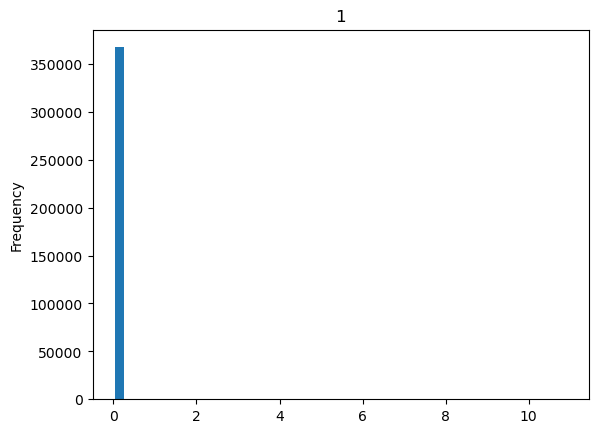

In [51]:
analyzeHttpLatency("./tests/test1/VUS1/httpThroughputsTest1VU1.csv", 1, 50)

count:  897804
median:  359.478
mean:  501.64571051588115
min:  45.021
max:  24444.079999999998
throughput:  14963.4


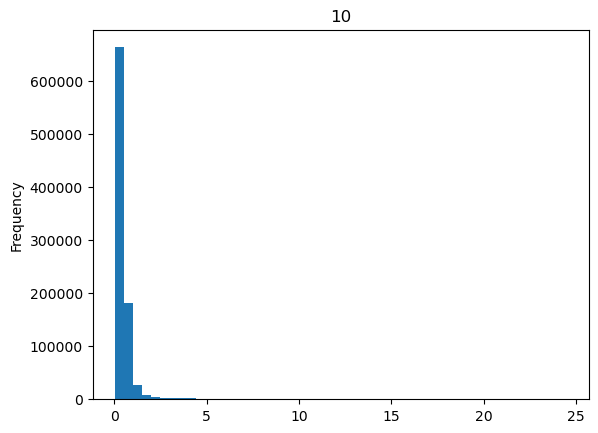

In [52]:
analyzeHttpLatency("./tests/test1/VUS10/httpThroughputsTest1VU10.csv", 10, 50)

count:  1162237
median:  4051.012
mean:  4597.727972326643
min:  73.921
max:  123631.757
throughput:  19370.616666666665


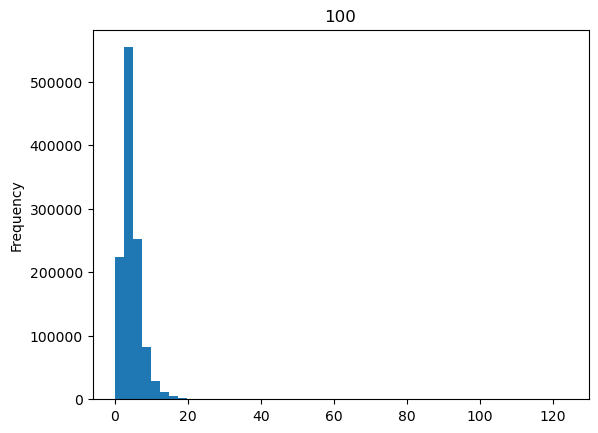

In [53]:
analyzeHttpLatency("./tests/test1/VUS100/httpThroughputsTest1VU100.csv", 100, 50)

count:  1215441
median:  14633.181
mean:  16598.768447984716
min:  101.769
max:  311817.498
throughput:  20257.35


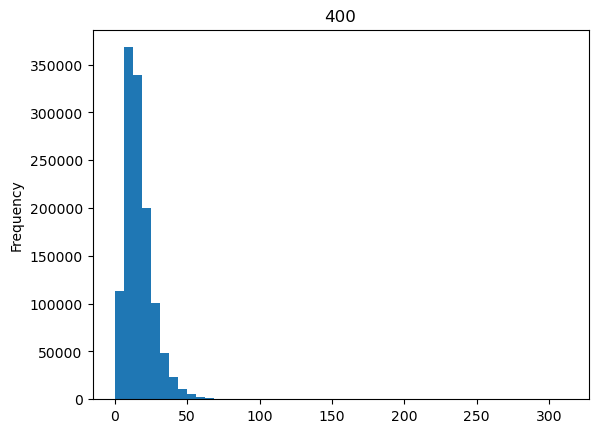

In [54]:
analyzeHttpLatency("./tests/test1/VUS400/httpThroughputsTest1VU400.csv", 400, 50)

<Axes: ylabel='Frequency'>

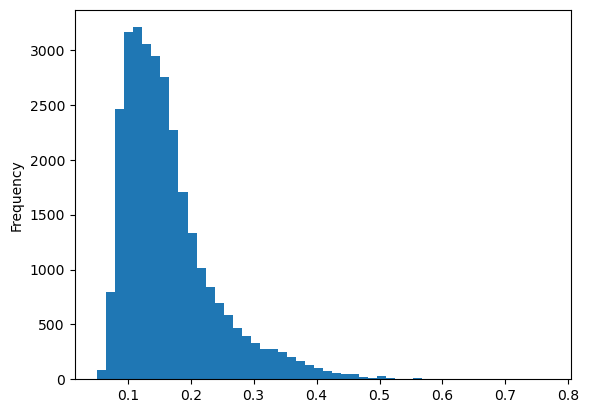

In [56]:
hLat1["metric_value"].loc[hLat1["metric_value"] <= 0.8].plot.hist(bins=50)

In [57]:
data = pandas.read_csv("./test1/VUS1/httpThroughputsTest1VU1.csv")
hThru1 = data[data["metric_name"] == "http_req_duration"]


In [58]:
print(hThru1.count() / 60)

metric_name          6149.716667
timestamp            6149.716667
metric_value         6149.716667
check                   0.000000
error                   0.000000
error_code              0.000000
expected_response    6149.716667
group                   0.000000
method               6149.716667
name                 6149.716667
proto                6149.716667
scenario             6149.716667
service                 0.000000
status               6149.716667
subproto                0.000000
tls_version             0.000000
url                  6149.716667
extra_tags              0.000000
metadata                0.000000
dtype: float64


## Charts

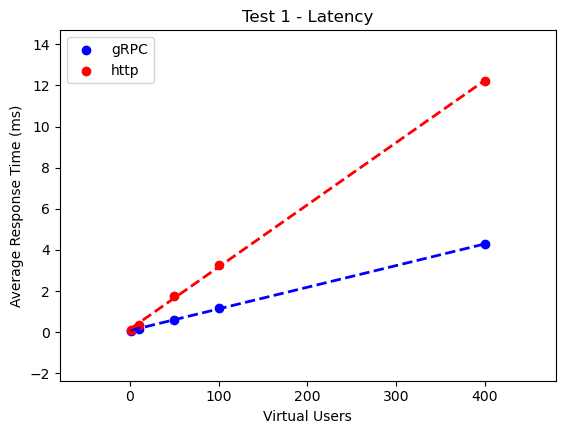

In [229]:
# generate latency chart

g_latencies = [
    t1_g1_lat_mean,
    t1_g10_lat_mean,
    t1_g50_lat_mean,
    t1_g100_lat_mean,
    t1_g400_lat_mean,
]
h_latencies = [
    t1_h1_lat_mean,
    t1_h10_lat_mean,
    t1_h50_lat_mean,
    t1_h100_lat_mean,
    t1_h400_lat_mean,
]
generateChart(
    test_vus,
    g_latencies,
    h_latencies,
    "Test 1 - Latency",
    "Virtual Users",
    "Average Response Time (ms)",
)

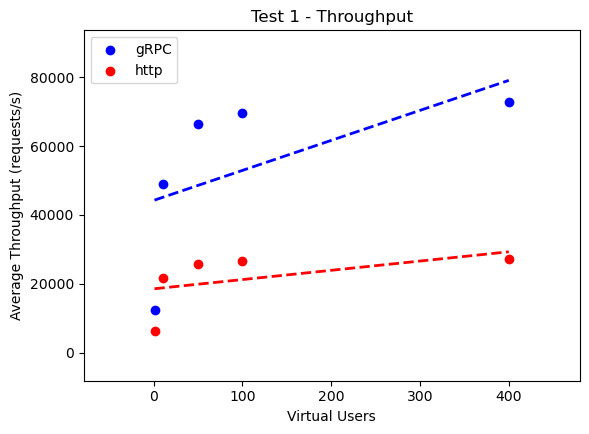

In [230]:
g_thrus = [t1_g1_thru, t1_g10_thru, t1_g50_thru, t1_g100_thru, t1_g400_thru]
h_thrus = [t1_h1_thru, t1_h10_thru, t1_h50_thru, t1_h100_thru, t1_h400_thru]
generateChart(
    test_vus,
    g_thrus,
    h_thrus,
    "Test 1 - Throughput",
    "Virtual Users",
    "Average Throughput (requests/s)",
)

## grpc analysis

8250.0
1370.0
59800.0


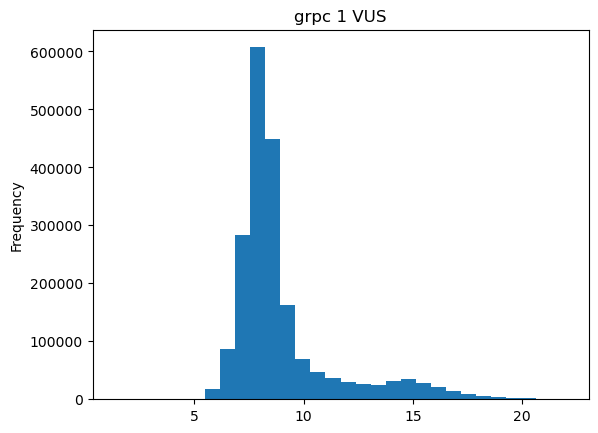

In [102]:
analyzeGrpcLatency("./test1/VUS1/grpcThroughputsTest1VU1.csv", "grpc 1 VUS", 30, 22)

6540.0
90.0
39420.0


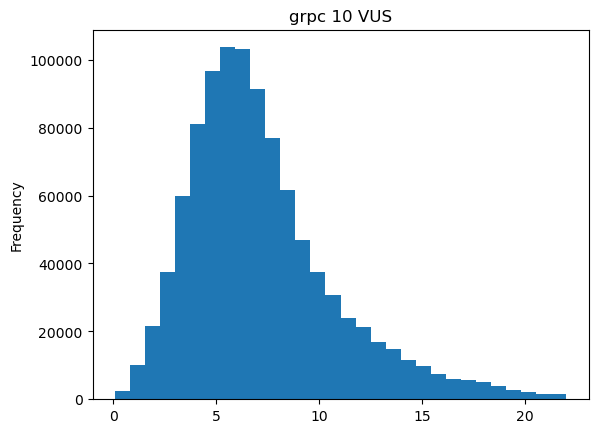

In [106]:
analyzeGrpcLatency("./test1/VUS10/grpcThroughputsTest1VU10.csv", "grpc 10 VUS", 30, 22)

6880.0
80.0
48650.0


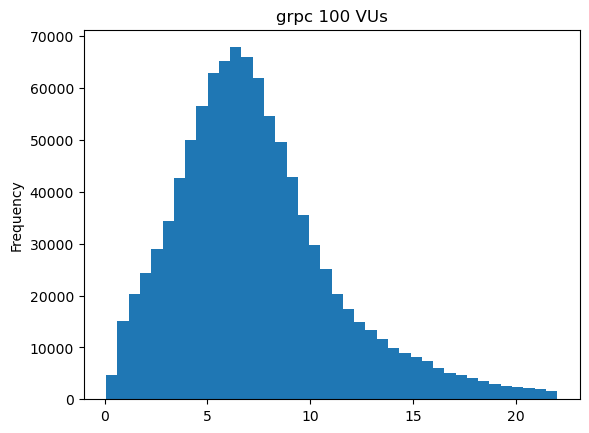

In [107]:
analyzeGrpcLatency("./test1/VUS100/grpcThroughputsTest1VU100.csv", "grpc 100 VUs", 40, 22)

8780.0
70.0
78790.0


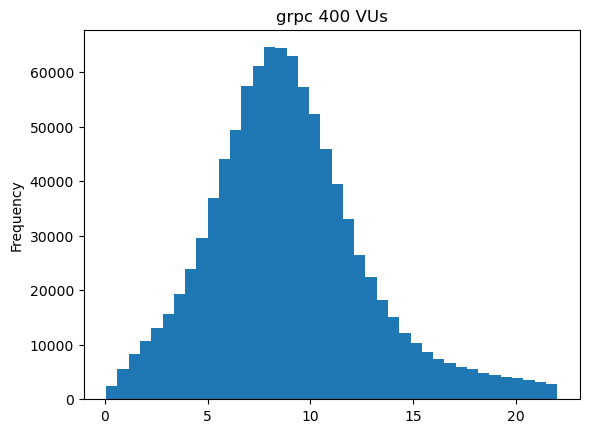

In [108]:
analyzeGrpcLatency("./test1/VUS400/grpcThroughputsTest1VU400.csv", "grpc 400 VUs", 40, 22)

# Test 2

## grpc

In [184]:
t2g1 = pandas.read_csv("./test2/grpcThroughputsTest2VU1.csv", low_memory=False)
t2g10 = pandas.read_csv("./test2/grpcThroughputsTest2VU10.csv", low_memory=False)
t2g50 = pandas.read_csv("./test2/grpcThroughputsTest2VU50.csv", low_memory=False)
t2g100 = pandas.read_csv("./test2/grpcThroughputsTest2VU100.csv", low_memory=False)
t2g400 = pandas.read_csv("./test2/grpcThroughputsTest2VU400.csv", low_memory=False)

In [182]:
# average throughput time
t2_g1_time = [39.42, 39.38, 39.32, 39.25]
t2_g10_time = [17.86, 17.30, 17.55, 17.90]
t2_g50_time = [16.87, 16.85, 16.82, 16.82]
t2_g100_time = [16.48, 16.57, 16.48, 16.54]
t2_g400_time = [16.75, 16.88, 16.51, 16.44]

t2_g1_avg = round(np.mean(t2_g1_time), 2)
t2_g50_avg = round(np.mean(t2_g50_time), 2)
t2_g100_avg = round(np.mean(t2_g100_time), 2)
t2_g400_avg = round(np.mean(t2_g400_time), 2)

print("Throughput time")
print(t2_g1_avg)
print(t2_g50_avg)
print(t2_g100_avg)
print(t2_g400_avg)

# average throughput
t2_g1_thru = getAverageThroughput(test2_iterations, t2_g1_time)
t2_g50_thru = getAverageThroughput(test2_iterations, t2_g10_time)
t2_g50_thru = getAverageThroughput(test2_iterations, t2_g50_time)
t2_g100_thru = getAverageThroughput(test2_iterations, t2_g100_time)
t2_g400_thru = getAverageThroughput(test2_iterations, t2_g400_time)

print("Througput")
print(t2_g1_thru)
print(t2_g50_thru)
print(t2_g100_thru)
print(t2_g400_thru)

# average latency
t2_g1_lat = t2g1["duration (ms)"].loc[t2g1["status"] == "OK"].mean()
t2_g50_lat = t2g50["duration (ms)"].loc[t2g50["status"] == "OK"].mean()
t2_g100_lat = t2g100["duration (ms)"].loc[t2g100["status"] == "OK"].mean()
t2_g400_lat = t2g400["duration (ms)"].loc[t2g400["status"] == "OK"].mean()

print("Response time")
print(t2_g1_lat)
print(t2_g50_lat)
print(t2_g100_lat)
print(t2_g400_lat)


Throughput time
39.34
16.84
16.52
16.64
Througput
5083.561034504671
11876.484560570072
12108.369910700772
12015.620306398318
Response time
0.18206104999999992
3.9826447
7.81738745
30.722467800000004


In [232]:

# average throughput
t2_g1_thru = round(getAverageThroughput(test2_iterations, t2_g1_time),2)
t2_g10_thru = round(getAverageThroughput(test2_iterations, t2_g10_time),2)
t2_g50_thru = round(getAverageThroughput(test2_iterations, t2_g50_time),2)
t2_g100_thru = round(getAverageThroughput(test2_iterations, t2_g100_time),2)
t2_g400_thru = round(getAverageThroughput(test2_iterations, t2_g400_time),2)

t2_g1_thru_min = round(test2_iterations / max(t2_g1_time), 2)
t2_g10_thru_min = round(test2_iterations / max(t2_g10_time), 2)
t2_g50_thru_min = round(test2_iterations / max(t2_g50_time), 2)
t2_g100_thru_min = round(test2_iterations / max(t2_g100_time), 2)
t2_g400_thru_min = round(test2_iterations / max(t2_g400_time), 2)

t2_g1_thru_max = round(test2_iterations / min(t2_g1_time), 2)
t2_g10_thru_max = round(test2_iterations / min(t2_g10_time), 2)
t2_g50_thru_max = round(test2_iterations / min(t2_g50_time), 2)
t2_g100_thru_max = round(test2_iterations / min(t2_g100_time), 2)
t2_g400_thru_max = round(test2_iterations / min(t2_g400_time), 2)

print("Througput")
print("avg, min, max")
print(t2_g1_thru, t2_g1_thru_min, t2_g1_thru_max)
print(t2_g10_thru, t2_g10_thru_min, t2_g10_thru_max)
print(t2_g50_thru, t2_g50_thru_min, t2_g50_thru_max)
print(t2_g100_thru, t2_g100_thru_min, t2_g100_thru_max)
print(t2_g400_thru, t2_g400_thru_min, t2_g400_thru_max)

# average latency
t2_g1_lat_mean = t2g1["duration (ms)"].loc[t2g1["status"] == "OK"].mean()
t2_g10_lat_mean = t2g10["duration (ms)"].loc[t2g10["status"] == "OK"].mean()
t2_g50_lat_mean = t2g50["duration (ms)"].loc[t2g50["status"] == "OK"].mean()
t2_g100_lat_mean = t2g100["duration (ms)"].loc[t2g100["status"] == "OK"].mean()
t2_g400_lat_mean = t2g400["duration (ms)"].loc[t2g400["status"] == "OK"].mean()

t2_g1_lat_mean = round(t2_g1_lat_mean, 2)
t2_g10_lat_mean = round(t2_g10_lat_mean, 2)
t2_g50_lat_mean = round(t2_g50_lat_mean, 2)
t2_g100_lat_mean = round(t2_g100_lat_mean, 2)
t2_g400_lat_mean = round(t2_g400_lat_mean, 2)

t2_g1_lat_min = t2g1["duration (ms)"].loc[t2g1["status"] == "OK"].min()
t2_g10_lat_min = t2g10["duration (ms)"].loc[t2g10["status"] == "OK"].min()
t2_g50_lat_min = t2g50["duration (ms)"].loc[t2g50["status"] == "OK"].min()
t2_g100_lat_min = t2g100["duration (ms)"].loc[t2g100["status"] == "OK"].min()
t2_g400_lat_min = t2g400["duration (ms)"].loc[t2g400["status"] == "OK"].min()

t2_g1_lat_max = t2g1["duration (ms)"].loc[t2g1["status"] == "OK"].max()
t2_g10_lat_max = t2g10["duration (ms)"].loc[t2g10["status"] == "OK"].max()
t2_g50_lat_max = t2g50["duration (ms)"].loc[t2g50["status"] == "OK"].max()
t2_g100_lat_max = t2g100["duration (ms)"].loc[t2g100["status"] == "OK"].max()
t2_g400_lat_max = t2g400["duration (ms)"].loc[t2g400["status"] == "OK"].max()

print("Response time:")
print("avg, min, max")
print(t2_g1_lat_mean, t2_g1_lat_min, t2_g1_lat_max)
print(t2_g10_lat_mean, t2_g10_lat_min, t2_g10_lat_max)
print(t2_g50_lat_mean, t2_g50_lat_min, t2_g50_lat_max)
print(t2_g100_lat_mean, t2_g100_lat_min, t2_g100_lat_max)
print(t2_g400_lat_mean, t2_g400_lat_min, t2_g400_lat_max)

Througput
avg, min, max
5083.56 5073.57 5095.54
11329.84 11173.18 11560.69
11876.48 11855.36 11890.61
12108.37 12070.01 12135.92
12015.62 11848.34 12165.45
Response time:
avg, min, max
0.18 0.13 1.3
0.84 0.15 10.12
3.98 0.16 20.02
7.82 0.17 45.52
30.72 0.2 203.55


## http

In [187]:
t2h1 = pandas.read_csv("./test2/httpThroughputTest2VU1.csv", low_memory=False)
t2h10 = pandas.read_csv("./test2/httpThroughputTest2VU10.csv", low_memory=False)
t2h50 = pandas.read_csv("./test2/httpThroughputTest2VU50.csv", low_memory=False)
t2h100 = pandas.read_csv("./test2/httpThroughputTest2VU100.csv", low_memory=False)
t2h400 = pandas.read_csv("./test2/httpThroughputTest2VU400.csv", low_memory=False)

t2h1 = t2h1[t2h1["metric_name"] == "http_req_duration"]
t2h10 = t2h10[t2h10["metric_name"] == "http_req_duration"]
t2h50 = t2h50[t2h50["metric_name"] == "http_req_duration"]
t2h100 = t2h100[t2h100["metric_name"] == "http_req_duration"]
t2h400 = t2h400[t2h400["metric_name"] == "http_req_duration"]

In [189]:
# average throughput time
t2_h1_time = [83.65, 82.54, 82.51, 82.51] 
t2_h10_time = [20.49, 21.34, 21.24, 20.36]
t2_h50_time = [17.62, 17.37, 17.43, 17.72] 
t2_h100_time = [17.08, 18.14, 16.89, 17.07] 
t2_h400_time = [16.80, 16.68, 16.71, 16.54] 

t2_h1_avg = round(np.mean(t2_h1_time), 2)
t2_h50_avg = round(np.mean(t2_h50_time), 2)
t2_h100_avg = round(np.mean(t2_h100_time), 2)
t2_h400_avg = round(np.mean(t2_h400_time), 2)

print("Throughput time")
print(t2_h1_avg)
print(t2_h50_avg)
print(t2_h100_avg)
print(t2_h400_avg)

# average throughput
t2_h1_thru = getAverageThroughput(test2_iterations, t2_h1_time)
t2_h50_thru = getAverageThroughput(test2_iterations, t2_h50_time)
t2_h100_thru = getAverageThroughput(test2_iterations, t2_h100_time)
t2_h400_thru = getAverageThroughput(test2_iterations, t2_h400_time)

print("Througput")
print(t2_h1_thru)
print(t2_h50_thru)
print(t2_h100_thru)
print(t2_h400_thru)

# average latency
t2_h1_lat = t2h1["metric_value"].mean()
t2_h50_lat = t2h50["metric_value"].mean()
t2_h100_lat = t2h100["metric_value"].mean()
t2_h400_lat = t2h400["metric_value"].mean()

print("Response time")
print(t2_h1_lat)
print(t2_h50_lat)
print(t2_h100_lat)
print(t2_h400_lat)


Throughput time
82.8
17.54
17.3
16.68
Througput
2415.3860088765437
11405.75990875392
11564.03584851113
11988.610819721263
Response time
0.325975579255
4.0938492569700005
7.836406371304999
29.312174431009993


In [191]:
# average throughput
t2_h1_thru = round(getAverageThroughput(test2_iterations, t2_h1_time), 2)
t2_h10_thru = round(getAverageThroughput(test2_iterations, t2_h10_time), 2)
t2_h50_thru = round(getAverageThroughput(test2_iterations, t2_h50_time), 2)
t2_h100_thru = round(getAverageThroughput(test2_iterations, t2_h100_time), 2)
t2_h400_thru = round(getAverageThroughput(test2_iterations, t2_h400_time), 2)

t2_h1_thru_min = round(test2_iterations / max(t2_h1_time), 2)
t2_h10_thru_min = round(test2_iterations / max(t2_h10_time), 2)
t2_h50_thru_min = round(test2_iterations / max(t2_h50_time), 2)
t2_h100_thru_min = round(test2_iterations / max(t2_h100_time), 2)
t2_h400_thru_min = round(test2_iterations / max(t2_h400_time), 2)

t2_h1_thru_max = round(test2_iterations / min(t2_h1_time), 2)
t2_h10_thru_max = round(test2_iterations / min(t2_h10_time), 2)
t2_h50_thru_max = round(test2_iterations / min(t2_h50_time), 2)
t2_h100_thru_max = round(test2_iterations / min(t2_h100_time), 2)
t2_h400_thru_max = round(test2_iterations / min(t2_h400_time), 2)

print("Througput")
print("avg, min, max")
print(t2_h1_thru, t2_h1_thru_min, t2_h1_thru_max)
print(t2_h10_thru, t2_h10_thru_min, t2_h10_thru_max)
print(t2_h50_thru, t2_h50_thru_min, t2_h50_thru_max)
print(t2_h100_thru, t2_h100_thru_min, t2_h100_thru_max)
print(t2_h400_thru, t2_h400_thru_min, t2_h400_thru_max)

# average latency
t2_h1_lat_mean = t2h1["metric_value"].mean()
t2_h10_lat_mean = t2h10["metric_value"].mean()
t2_h50_lat_mean = t2h50["metric_value"].mean()
t2_h100_lat_mean = t2h100["metric_value"].mean()
t2_h400_lat_mean = t2h400["metric_value"].mean()

t2_h1_lat_mean = round(t2_h1_lat_mean, 2)
t2_h10_lat_mean = round(t2_h10_lat_mean, 2)
t2_h50_lat_mean = round(t2_h50_lat_mean, 2)
t2_h100_lat_mean = round(t2_h100_lat_mean, 2)
t2_h400_lat_mean = round(t2_h400_lat_mean, 2)

t2_h1_lat_min = round(t2h1["metric_value"].min(),2)
t2_h10_lat_min = round(t2h10["metric_value"].min(),2)
t2_h50_lat_min = round(t2h50["metric_value"].min(),2)
t2_h100_lat_min = round(t2h100["metric_value"].min(),2)
t2_h400_lat_min = round(t2h400["metric_value"].min(),2)

t2_h1_lat_max = round(t2h1["metric_value"].max(),2)
t2_h10_lat_max = round(t2h10["metric_value"].max(),2)
t2_h50_lat_max = round(t2h50["metric_value"].max(),2)
t2_h100_lat_max = round(t2h100["metric_value"].max(),2)
t2_h400_lat_max = round(t2h400["metric_value"].max(),2)

print("Response time:")
print("avg, min, max")
print(t2_h1_lat_mean, t2_h1_lat_min, t2_h1_lat_max)
print(t2_h10_lat_mean, t2_h10_lat_min, t2_h10_lat_max)
print(t2_h50_lat_mean, t2_h50_lat_min, t2_h50_lat_max)
print(t2_h100_lat_mean, t2_h100_lat_min, t2_h100_lat_max)
print(t2_h400_lat_mean, t2_h400_lat_min, t2_h400_lat_max)

Througput
avg, min, max
2415.39 2390.91 2423.95
9588.88 9372.07 9823.18
11405.76 11286.68 11514.1
11564.04 11025.36 11841.33
11988.61 11904.76 12091.9
Response time:
avg, min, max
0.33 0.22 3.56
0.89 0.21 11.25
4.09 0.26 35.67
7.84 0.26 49.7
29.31 0.31 166.69


## charts

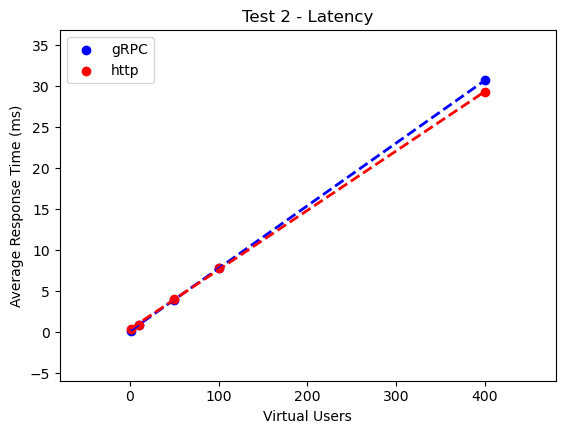

In [227]:
# generate latency chart
t2_g_latencies = [t2_g1_lat_mean, t2_g10_lat_mean, t2_g50_lat_mean, t2_g100_lat_mean, t2_g400_lat_mean]
t2_h_latencies = [t2_h1_lat_mean, t2_h10_lat_mean, t2_h50_lat_mean, t2_h100_lat_mean, t2_h400_lat_mean]
generateChart(
    test_vus,
    t2_g_latencies,
    t2_h_latencies,
    "Test 2 - Latency",
    "Virtual Users",
    "Average Response Time (ms)",
)

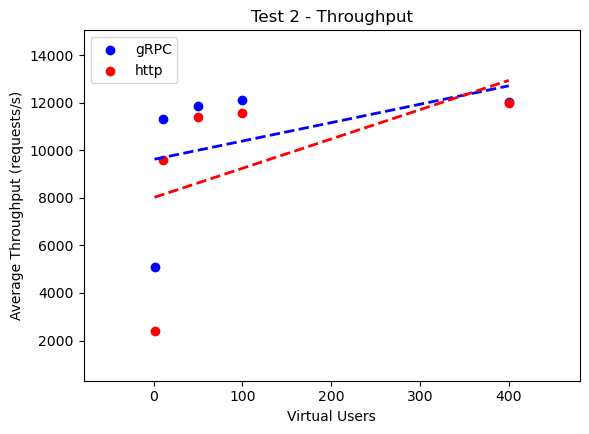

In [228]:
t2_g_thrus = [t2_g1_thru, t2_g10_thru, t2_g50_thru, t2_g100_thru, t2_g400_thru]
t2_h_thrus = [t2_h1_thru, t2_h10_thru, t2_h50_thru, t2_h100_thru, t2_h400_thru]

generateChart(
    test_vus,
    t2_g_thrus,
    t2_h_thrus,
    "Test 2 - Throughput",
    "Virtual Users",
    "Average Throughput (requests/s)",
)

# test 3

## grpc

In [196]:
t3g1 = pandas.read_csv("./test3/grpcThroughputsTest3VU1.csv", low_memory=False)
t3g10 = pandas.read_csv("./test3/grpcThroughputsTest3VU10.csv", low_memory=False)
t3g50 = pandas.read_csv("./test3/grpcThroughputsTest3VU50.csv", low_memory=False)
t3g100 = pandas.read_csv("./test3/grpcThroughputsTest3VU100.csv", low_memory=False)
t3g400 = pandas.read_csv("./test3/grpcThroughputsTest3VU400.csv", low_memory=False)

In [197]:
# average throughput time
t3_g1_time =   [51.66, 50.76, 50.95, 51.59]
t3_g10_time =  [30.15, 29.02, 29.00, 28.88]
t3_g50_time =  [28.17, 28.11, 28.13, 28.16]
t3_g100_time = [28.08, 28.24, 28.06, 28.05]
t3_g400_time = [29.00, 28.35, 28.35, 28.28]

t3_g1_avg = round(np.mean(t3_g1_time), 2)
t3_g50_avg = round(np.mean(t3_g50_time), 2)
t3_g100_avg = round(np.mean(t3_g100_time), 2)
t3_g400_avg = round(np.mean(t3_g400_time), 2)

print("Throughput time")
print(t3_g1_avg)
print(t3_g50_avg)
print(t3_g100_avg)
print(t3_g400_avg)

# average throughput
t3_g1_thru = getAverageThroughput(test3_iterations, t3_g1_time)
t3_g50_thru = getAverageThroughput(test3_iterations, t3_g50_time)
t3_g100_thru = getAverageThroughput(test3_iterations, t3_g100_time)
t3_g400_thru = getAverageThroughput(test3_iterations, t3_g400_time)

print("Througput")
print(t3_g1_thru)
print(t3_g50_thru)
print(t3_g100_thru)
print(t3_g400_thru)

# average latency
t3_g1_lat = t3g1["duration (ms)"].loc[t3g1["status"] == "OK"].mean()
t3_g50_lat = t3g50["duration (ms)"].loc[t3g50["status"] == "OK"].mean()
t3_g100_lat = t3g100["duration (ms)"].loc[t3g100["status"] == "OK"].mean()
t3_g400_lat = t3g400["duration (ms)"].loc[t3g400["status"] == "OK"].mean()

print("Response time")
print(t3_g1_lat)
print(t3_g50_lat)
print(t3_g100_lat)
print(t3_g400_lat)


Throughput time
51.24
28.14
28.11
28.5
Througput
390.32006245121
710.6689171182376
711.5538557324558
701.877522372346
Response time
2.5465355
69.10037450000002
136.6606995
547.7493348669734


In [231]:

# average throughput
t3_g1_thru = round(getAverageThroughput(test3_iterations, t3_g1_time),2)
t3_g10_thru = round(getAverageThroughput(test3_iterations, t3_g10_time),2)
t3_g50_thru = round(getAverageThroughput(test3_iterations, t3_g50_time),2)
t3_g100_thru = round(getAverageThroughput(test3_iterations, t3_g100_time),2)
t3_g400_thru = round(getAverageThroughput(test3_iterations, t3_g400_time),2)

t3_g1_thru_min = round(test3_iterations / max(t3_g1_time), 2)
t3_g10_thru_min = round(test3_iterations / max(t3_g10_time), 2)
t3_g50_thru_min = round(test3_iterations / max(t3_g50_time), 2)
t3_g100_thru_min = round(test3_iterations / max(t3_g100_time), 2)
t3_g400_thru_min = round(test3_iterations / max(t3_g400_time), 2)

t3_g1_thru_max = round(test3_iterations / min(t3_g1_time), 2)
t3_g10_thru_max = round(test3_iterations / min(t3_g10_time), 2)
t3_g50_thru_max = round(test3_iterations / min(t3_g50_time), 2)
t3_g100_thru_max = round(test3_iterations / min(t3_g100_time), 2)
t3_g400_thru_max = round(test3_iterations / min(t3_g400_time), 2)

print("Througput")
print("avg, min, max")
print(t3_g1_thru, t3_g1_thru_min, t3_g1_thru_max)
print(t3_g10_thru, t3_g10_thru_min, t3_g10_thru_max)
print(t3_g50_thru, t3_g50_thru_min, t3_g50_thru_max)
print(t3_g100_thru, t3_g100_thru_min, t3_g100_thru_max)
print(t3_g400_thru, t3_g400_thru_min, t3_g400_thru_max)

# average latency
t3_g1_lat_mean = t3g1["duration (ms)"].loc[t3g1["status"] == "OK"].mean()
t3_g10_lat_mean = t3g10["duration (ms)"].loc[t3g10["status"] == "OK"].mean()
t3_g50_lat_mean = t3g50["duration (ms)"].loc[t3g50["status"] == "OK"].mean()
t3_g100_lat_mean = t3g100["duration (ms)"].loc[t3g100["status"] == "OK"].mean()
t3_g400_lat_mean = t3g400["duration (ms)"].loc[t3g400["status"] == "OK"].mean()

t3_g1_lat_mean = round(t3_g1_lat_mean, 2)
t3_g10_lat_mean = round(t3_g10_lat_mean, 2)
t3_g50_lat_mean = round(t3_g50_lat_mean, 2)
t3_g100_lat_mean = round(t3_g100_lat_mean, 2)
t3_g400_lat_mean = round(t3_g400_lat_mean, 2)

t3_g1_lat_min = t3g1["duration (ms)"].loc[t3g1["status"] == "OK"].min()
t3_g10_lat_min = t3g10["duration (ms)"].loc[t3g10["status"] == "OK"].min()
t3_g50_lat_min = t3g50["duration (ms)"].loc[t3g50["status"] == "OK"].min()
t3_g100_lat_min = t3g100["duration (ms)"].loc[t3g100["status"] == "OK"].min()
t3_g400_lat_min = t3g400["duration (ms)"].loc[t3g400["status"] == "OK"].min()

t3_g1_lat_max = t3g1["duration (ms)"].loc[t3g1["status"] == "OK"].max()
t3_g10_lat_max = t3g10["duration (ms)"].loc[t3g10["status"] == "OK"].max()
t3_g50_lat_max = t3g50["duration (ms)"].loc[t3g50["status"] == "OK"].max()
t3_g100_lat_max = t3g100["duration (ms)"].loc[t3g100["status"] == "OK"].max()
t3_g400_lat_max = t3g400["duration (ms)"].loc[t3g400["status"] == "OK"].max()

print("Response time:")
print("avg, min, max")
print(t3_g1_lat_mean, t3_g1_lat_min, t3_g1_lat_max)
print(t3_g10_lat_mean, t3_g10_lat_min, t3_g10_lat_max)
print(t3_g50_lat_mean, t3_g50_lat_min, t3_g50_lat_max)
print(t3_g100_lat_mean, t3_g100_lat_min, t3_g100_lat_max)
print(t3_g400_lat_mean, t3_g400_lat_min, t3_g400_lat_max)

Througput
avg, min, max
390.32 387.15 394.01
683.47 663.35 692.52
710.67 709.98 711.49
711.55 708.22 713.01
701.88 689.66 707.21
Response time:
avg, min, max
2.55 1.72 4.73
14.29 2.99 55.76
69.1 3.64 396.65
136.66 5.05 1794.18
547.75 6.28 9635.97


## http

In [218]:
t3h1 = pandas.read_csv("./test3/httpThroughputTest3VU1.csv", low_memory=False)
t3h10 = pandas.read_csv("./test3/httpThroughputTest3VU10.csv", low_memory=False)
t3h50 = pandas.read_csv("./test3/httpThroughputTest3VU50.csv", low_memory=False)
t3h100 = pandas.read_csv("./test3/httpThroughputTest3VU100.csv", low_memory=False)
t3h400 = pandas.read_csv("./test3/httpThroughputTest3VU400.csv", low_memory=False)

t3h1 = t3h1[t3h1["metric_name"] == "http_req_duration"]
t3h10 = t3h10[t3h10["metric_name"] == "http_req_duration"]
t3h50 = t3h50[t3h50["metric_name"] == "http_req_duration"]
t3h100 = t3h100[t3h100["metric_name"] == "http_req_duration"]
t3h400 = t3h400[t3h400["metric_name"] == "http_req_duration"]

In [219]:
# average throughput time
t3_h1_time =   [96.43, 96.40, 96.31, 96.28] 
t3_h10_time =  [13.79, 12.56, 13.37, 12.57]
t3_h50_time =  [11.33, 11.14, 11.13, 11.03] 
t3_h100_time = [11.47, 10.83, 10.79, 11.01] 
t3_h400_time = [10.47, 10.54, 10.53, 10.78] 

t3_h1_avg = round(np.mean(t3_h1_time), 2)
t3_h50_avg = round(np.mean(t3_h50_time), 2)
t3_h100_avg = round(np.mean(t3_h100_time), 2)
t3_h400_avg = round(np.mean(t3_h400_time), 2)

print("Throughput time")
print(t3_h1_avg)
print(t3_h50_avg)
print(t3_h100_avg)
print(t3_h400_avg)

# average throughput
t3_h1_thru = getAverageThroughput(test3_iterations, t3_h1_time)
t3_h50_thru = getAverageThroughput(test3_iterations, t3_h50_time)
t3_h100_thru = getAverageThroughput(test3_iterations, t3_h100_time)
t3_h400_thru = getAverageThroughput(test3_iterations, t3_h400_time)

print("Througput")
print(t3_h1_thru)
print(t3_h50_thru)
print(t3_h100_thru)
print(t3_h400_thru)

# average latency
t3_h1_lat = t3h1["metric_value"].mean()
t3_h50_lat = t3h50["metric_value"].mean()
t3_h100_lat = t3h100["metric_value"].mean()
t3_h400_lat = t3h400["metric_value"].mean()

print("Response time")
print(t3_h1_lat)
print(t3_h50_lat)
print(t3_h100_lat)
print(t3_h400_lat)


Throughput time
96.35
11.16
11.02
10.58
Througput
207.56577240413057
1792.5162446784673
1814.0589569160998
1890.359168241966
Response time
4.7122828884
25.0991888785
48.2066762776
168.29870225924998


In [220]:
# average throughput
t3_h1_thru = round(getAverageThroughput(test3_iterations, t3_h1_time), 2)
t3_h10_thru = round(getAverageThroughput(test3_iterations, t3_h10_time), 2)
t3_h50_thru = round(getAverageThroughput(test3_iterations, t3_h50_time), 2)
t3_h100_thru = round(getAverageThroughput(test3_iterations, t3_h100_time), 2)
t3_h400_thru = round(getAverageThroughput(test3_iterations, t3_h400_time), 2)

t3_h1_thru_min = round(test3_iterations / max(t3_h1_time), 2)
t3_h10_thru_min = round(test3_iterations / max(t3_h10_time), 2)
t3_h50_thru_min = round(test3_iterations / max(t3_h50_time), 2)
t3_h100_thru_min = round(test3_iterations / max(t3_h100_time), 2)
t3_h400_thru_min = round(test3_iterations / max(t3_h400_time), 2)

t3_h1_thru_max = round(test3_iterations / min(t3_h1_time), 2)
t3_h10_thru_max = round(test3_iterations / min(t3_h10_time), 2)
t3_h50_thru_max = round(test3_iterations / min(t3_h50_time), 2)
t3_h100_thru_max = round(test3_iterations / min(t3_h100_time), 2)
t3_h400_thru_max = round(test3_iterations / min(t3_h400_time), 2)

print("Througput")
print("avg, min, max")
print(t3_h1_thru, t3_h1_thru_min, t3_h1_thru_max)
print(t3_h10_thru, t3_h10_thru_min, t3_h10_thru_max)
print(t3_h50_thru, t3_h50_thru_min, t3_h50_thru_max)
print(t3_h100_thru, t3_h100_thru_min, t3_h100_thru_max)
print(t3_h400_thru, t3_h400_thru_min, t3_h400_thru_max)

# average latency
t3_h1_lat_mean = t3h1["metric_value"].mean()
t3_h10_lat_mean = t3h10["metric_value"].mean()
t3_h50_lat_mean = t3h50["metric_value"].mean()
t3_h100_lat_mean = t3h100["metric_value"].mean()
t3_h400_lat_mean = t3h400["metric_value"].mean()

t3_h1_lat_mean = round(t3_h1_lat_mean, 2)
t3_h10_lat_mean = round(t3_h10_lat_mean, 2)
t3_h50_lat_mean = round(t3_h50_lat_mean, 2)
t3_h100_lat_mean = round(t3_h100_lat_mean, 2)
t3_h400_lat_mean = round(t3_h400_lat_mean, 2)

t3_h1_lat_min = round(t3h1["metric_value"].min(),2)
t3_h10_lat_min = round(t3h10["metric_value"].min(),2)
t3_h50_lat_min = round(t3h50["metric_value"].min(),2)
t3_h100_lat_min = round(t3h100["metric_value"].min(),2)
t3_h400_lat_min = round(t3h400["metric_value"].min(),2)

t3_h1_lat_max = round(t3h1["metric_value"].max(),2)
t3_h10_lat_max = round(t3h10["metric_value"].max(),2)
t3_h50_lat_max = round(t3h50["metric_value"].max(),2)
t3_h100_lat_max = round(t3h100["metric_value"].max(),2)
t3_h400_lat_max = round(t3h400["metric_value"].max(),2)

print("Response time:")
print("avg, min, max")
print(t3_h1_lat_mean, t3_h1_lat_min, t3_h1_lat_max)
print(t3_h10_lat_mean, t3_h10_lat_min, t3_h10_lat_max)
print(t3_h50_lat_mean, t3_h50_lat_min, t3_h50_lat_max)
print(t3_h100_lat_mean, t3_h100_lat_min, t3_h100_lat_max)
print(t3_h400_lat_mean, t3_h400_lat_min, t3_h400_lat_max)

Througput
avg, min, max
207.57 207.4 207.73
1529.93 1450.33 1592.36
1792.52 1765.23 1813.24
1814.06 1743.68 1853.57
1890.36 1855.29 1910.22
Response time:
avg, min, max
4.71 1.62 13.95
6.36 2.32 22.81
25.1 2.57 162.31
48.21 2.6 295.71
168.3 2.58 786.65


count:  20000
median:  6.0728915
mean:  6.36307089365
min:  2.318305
max:  22.811617


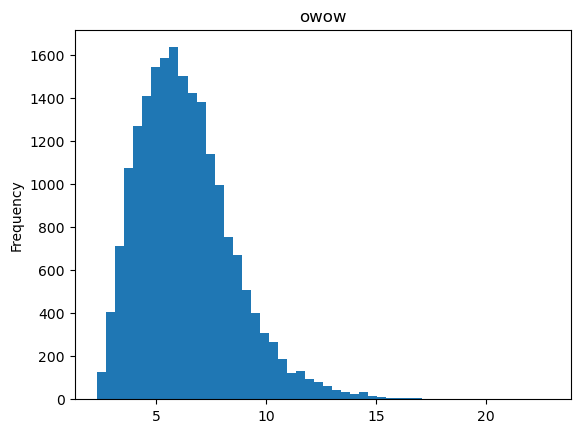

In [221]:
analyzeHttpLatency("./test3/httpThroughputTest3VU10.csv", "owow", 50)

## charts

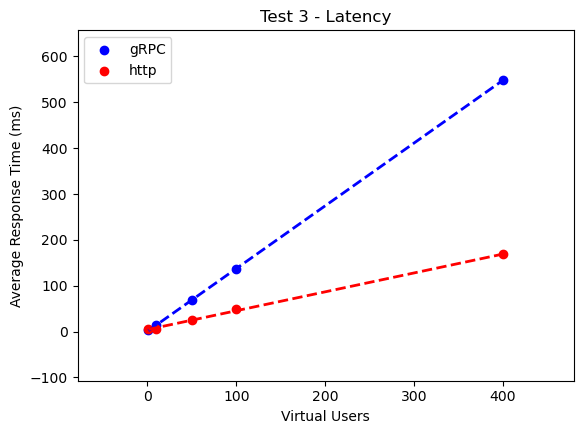

In [225]:
# generate latency chart
t3_g_latencies = [
    t3_g1_lat_mean,
    t3_g10_lat_mean,
    t3_g50_lat_mean,
    t3_g100_lat_mean,
    t3_g400_lat_mean,
]
t3_h_latencies = [
    t3_h1_lat_mean,
    t3_h10_lat_mean,
    t3_h50_lat_mean,
    t3_h100_lat_mean,
    t3_h400_lat_mean,
]
generateChart(
    test_vus,
    t3_g_latencies,
    t3_h_latencies,
    "Test 3 - Latency",
    "Virtual Users",
    "Average Response Time (ms)",
)

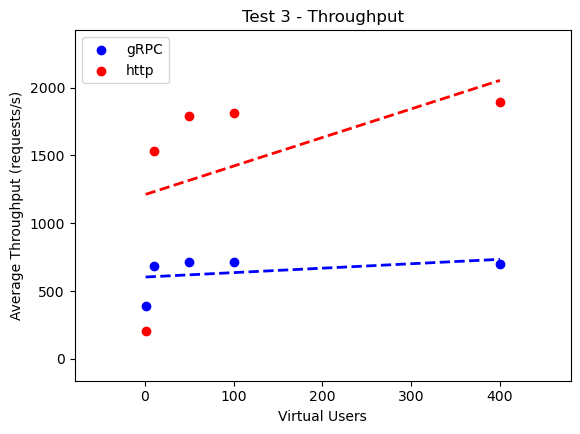

In [226]:
t3_g_thrus = [t3_g1_thru, t3_g10_thru, t3_g50_thru, t3_g100_thru, t3_g400_thru]
t3_h_thrus = [t3_h1_thru, t3_h10_thru, t3_h50_thru, t3_h100_thru, t3_h400_thru]

generateChart(
    test_vus,
    t3_g_thrus,
    t3_h_thrus,
    "Test 3 - Throughput",
    "Virtual Users",
    "Average Throughput (requests/s)",
)